In [1]:
import numpy as np
import sys
sys.path.append('../../functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
plt.rcParams.update({'font.size':14})
from pyproj import Proj

In [2]:
path = '/work/bk1377/a270230/'
path_stat = path + 'statistics/'
path_imgs = path + 'imgs/'

In [3]:
# load mean ice concentration, total ice covered area, mean ice thickness,
# and total ice volume for all years of the model run (1986 - 2100 for 4km,
# 2013 - 2020 & 2093 - 2100 for 1km)
[a_mean, area_total, h_mean, vol_total, years] = np.load(
    path_stat + f'ice_area_thickness_4km.npy', allow_pickle=True)

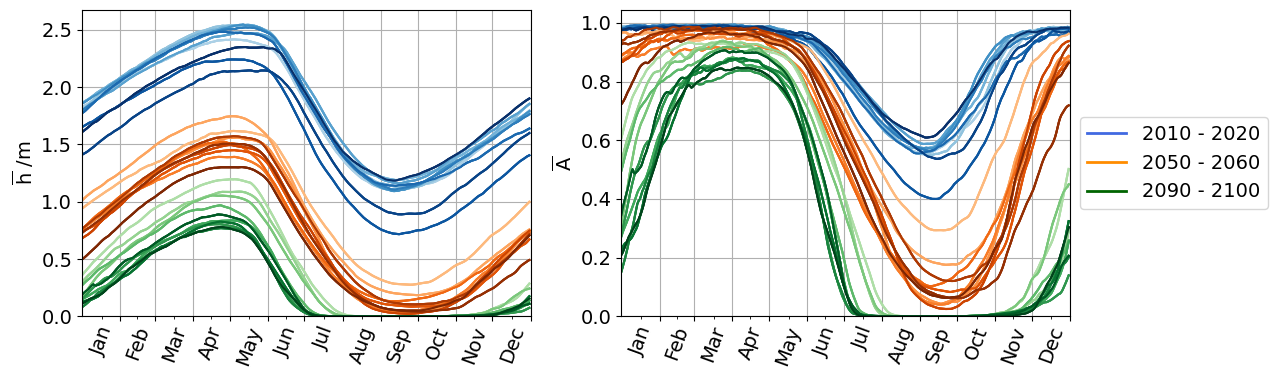

In [46]:
startyears = [2010, 2050, 2090]
fig, axs = plt.subplots(1,2,figsize=(13,4))

color_range = np.linspace(0, 100, 10)
norm = plt.Normalize(vmin=-50, vmax=100)
cmaps =[plt.cm.Blues, plt.cm.Oranges, plt.cm.Greens]

for startyear in startyears:
    i0 = np.where(years==startyears[0])[0][0]
    i1 = np.where(years==startyears[1])[0][0]
    i2 = np.where(years==startyears[2])[0][0]

    for ax, var in zip(axs, [h_mean, a_mean]):
        for var_time_frame, cmap in zip([var[i0:i0+11], var[i1:i1+11], var[i2:i2+11]], cmaps):
            
            for var_yearly, color in zip(var_time_frame, color_range):
                
                ax.plot(var_yearly, color = cmap(norm(color)))    

colors = ['royalblue', 'darkorange', 'darkgreen']
handles = [Line2D([0], [0], color=colors[i], linewidth=2) for i in range(len(colors))]
axs[1].legend(handles, ['2010 - 2020', '2050 - 2060', '2090 - 2100'], loc='center left', bbox_to_anchor=(1,0.5))
axs[1].set_ylabel(r'$\overline{\rm{A}}$')
axs[0].set_ylabel(r'$\overline{\rm{h}}$ /m')
for ax in axs:
    ax.grid()
    ax.set_xlim([0,365])
    ax.set_ylim([0,None])
    ax.set_xticks(xticks,[])
    ax.set_xticks(xticks_minor,xticks_labels, rotation=70, minor=True)
fig.tight_layout()

In [89]:
# make an array of the right np.shape out of the variables.
# this is necessary for using np.nanmean on them as it does
# not work on dtype objects
def recreate(var):
    arr = np.zeros((len(var),365))
    for year, var_y in enumerate(var):
        arr[year,:] = var_y
    return arr

a_mean = recreate(a_mean)
h_mean = recreate(h_mean)

def get_av_sd(var, years_lower, years_upper):
    i0 = np.where(years==years_lower)[0][0]
    i1 = np.where(years==years_upper)[0][0]
    
    arr = var[i0:i1+1]
    av = np.nanmean(arr, axis=0)
    sd = np.nanstd(arr, axis=0)
    return av, sd

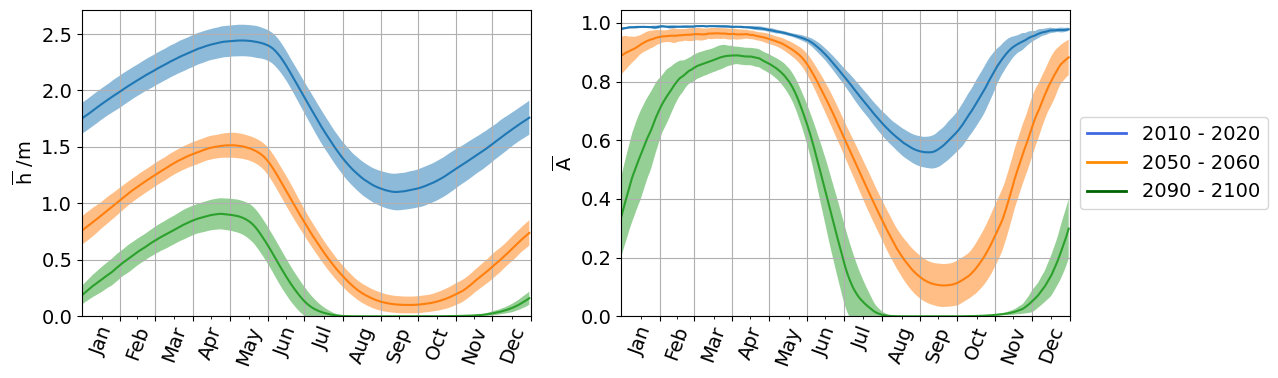

In [90]:
startyears = [2010, 2050, 2090]
fig, axs = plt.subplots(1,2, figsize=(13,4))

for ax, var in zip(axs, [h_mean, a_mean]):
    for startyear in startyears:
    
        av, sd = get_av_sd(var, startyear, startyear+10)
    
        ax.plot(av)
        ax.fill_between(np.arange(len(av)), av-sd, av+sd, alpha=0.5)
    
    ax.grid()
    ax.set_xlim([0,365])
    ax.set_ylim([0,None])
    ax.set_xticks(xticks,[])
    ax.set_xticks(xticks_minor,xticks_labels, rotation=70, minor=True)
colors = ['royalblue', 'darkorange', 'darkgreen']
handles = [Line2D([0], [0], color=colors[i], linewidth=2) for i in range(len(colors))]
axs[1].legend(handles, ['2010 - 2020', '2050 - 2060', '2090 - 2100'], loc='center left', bbox_to_anchor=(1,0.5))
axs[1].set_ylabel(r'$\overline{\rm{A}}$')
axs[0].set_ylabel(r'$\overline{\rm{h}}$ /m')
fig.tight_layout()